In [3]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.cluster import KMeans
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

In [133]:
iris = datasets.load_iris()

In [134]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [135]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [136]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [137]:
iris['data'].shape

(150, 4)

In [138]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [139]:
iris['target'].shape

(150,)

In [140]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [141]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [142]:
X = pd.DataFrame(iris['data'],columns=iris['feature_names'])
X.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [143]:
model = KNeighborsClassifier()

In [144]:
y = iris.target

In [145]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [146]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [147]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [148]:
147/150

0.98

In [149]:
model.predict(X)-y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [150]:
model.score(X,y)

0.9666666666666667

In [151]:
145/150

0.9666666666666667

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5,stratify = y)

In [153]:
# data  50 50 50
# test  20 10 15
# train 30 40 35

# test  15 15 15
# train 35 35 35



In [154]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
68,6.2,2.2,4.5,1.5
28,5.2,3.4,1.4,0.2
98,5.1,2.5,3.0,1.1
24,4.8,3.4,1.9,0.2
103,6.3,2.9,5.6,1.8
22,4.6,3.6,1.0,0.2
0,5.1,3.5,1.4,0.2
137,6.4,3.1,5.5,1.8
143,6.8,3.2,5.9,2.3
149,5.9,3.0,5.1,1.8


In [155]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
118,7.7,2.6,6.9,2.3
86,6.7,3.1,4.7,1.5
7,5.0,3.4,1.5,0.2
94,5.6,2.7,4.2,1.3
15,5.7,4.4,1.5,0.4
53,5.5,2.3,4.0,1.3
27,5.2,3.5,1.5,0.2
111,6.4,2.7,5.3,1.9
61,5.9,3.0,4.2,1.5


In [156]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [157]:
model.predict(X_test)

array([0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0,
       2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0,
       2])

In [158]:
y_test

array([0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0,
       2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0,
       2])

In [159]:
43/45

0.9555555555555556

In [160]:
model.score(X_test,y_test)

0.9333333333333333

In [161]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)
    

In [162]:
test_scores

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

In [163]:
train_scores

[1.0,
 0.9809523809523809,
 0.9714285714285714,
 0.9809523809523809,
 0.9904761904761905,
 0.9904761904761905,
 0.9904761904761905,
 0.9904761904761905,
 0.9904761904761905,
 0.9809523809523809,
 0.9904761904761905,
 0.9904761904761905,
 1.0,
 0.9809523809523809,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9904761904761905]

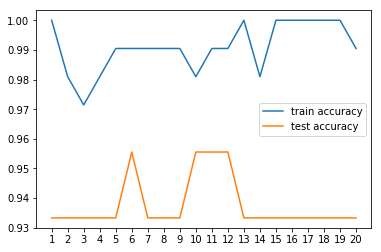

In [164]:
plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [165]:
cancer = datasets.load_breast_cancer()

In [166]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [167]:
knn = KNeighborsClassifier()

In [168]:
y =cancer['target']

In [169]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [170]:
knn.score(X,y)

0.9472759226713533

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42,stratify=y)

In [172]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [173]:
knn.score(X_test,y_test)

0.9239766081871345

In [174]:
knn.score(X_train,y_train)

0.949748743718593

In [175]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9239766081871345

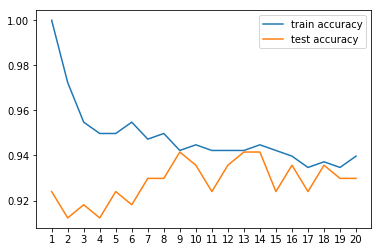

0.9239766081871345

In [176]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)



plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [177]:
np.random.seed(5)
for i in range(10):    
    print(np.random.randint(7))

3
6
5
6
6
0
1
0
4
6


In [178]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [179]:
class 1

0.2    - 1/0.2= 5
0.5    - 1/0.5= 2

7



class 2

1.1   - 1/1.1=0.9
1.0   - 1/1=1
0.8   - 1/0.8=1.25

3.15

distance = ((x2-x1)^2+(y2-y1)^2)^(1/2)   p =2

distance = |x2-x1|+|y2-y1|   p=1

distance = (|x2-x1|^3+|y2-y1|^3)^(1/3)  p=3

SyntaxError: invalid syntax (<ipython-input-179-103fa3f02a50>, line 1)

In [4]:
boston = datasets.load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston.DESCR)

In [ ]:
boston.data.shape

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston.feature_names

In [ ]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

In [ ]:
y = boston.target

In [ ]:

p1 - 1.2 - 21
p2 - 1.8 - 20
p3 - 5 -  12
p4 - 2.2 - 25
p5 - 0.3 - 21


In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn.fit(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.predict(X_test)

In [ ]:
y_test

In [ ]:
Mean_squared_error =mean (prediction - actual_value)^2


In [ ]:
y_pred = knn.predict(X_test)
mean_squared_error(y_test,y_pred)

In [ ]:
prediction actual_value

10    15   - -5 - after square 25
8      9   - -1 -      ''        1
10    7    -  3 -      ''       9

mean_squared_error = 11.67



In [ ]:
knn.score(X_test,y_test)

In [ ]:
np.mean(y_test)

In [ ]:
y_pred_avg = []
for i in range(len(y_test)):
    y_pred_avg.append(np.mean(y_test))

In [ ]:
y_pred_avg

In [ ]:
mean_squared_error(y_test,y_pred_avg)

In [ ]:
1 - mean_squared_error(y_test,y_pred)/mean_squared_error(y_test,y_pred_avg)

In [ ]:
accuracy = 1 - mse(our_model)/mse(average_prediction)


if mse(our_model)= 0  accuracy =1
if mse(our_model)== mse(avg_pred)  accuracy = 0
if mse(our_model)> mse(avg_pred) accuracy<0

R_squared metric - statistics 


In [ ]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.3,random_state=42)

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [ ]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)
plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3,n_jobs=-1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [ ]:
datasets.load_wine
datasets.load_diabetes

wines- classification problem 

diabetes - regression problem



In [19]:
boston = datasets.load_boston()

In [ ]:
X= boston.data

In [54]:
y=boston.target

In [22]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [59]:
X_rooms= X[:,[5]]

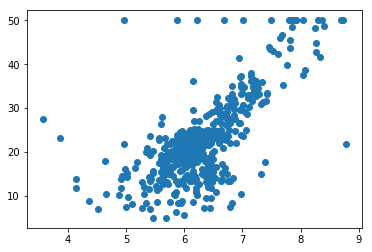

In [45]:
plt.scatter(X_rooms,y)
plt.show()

In [27]:
x data
y prediction

y = mx + c

y = b + ax

SyntaxError: invalid syntax (<ipython-input-27-48eb909fc15d>, line 1)

In [29]:
each point we have y - correct value
                   y_pred - predicted value
    error         = |y-y_pred|^2
    
Error function = sum of errors squared
 Error Function              = sigma(|y-y_pred|^2)
    d ErrorFunction/ da


p1 10 12   - 2
p2 15 17   - 2
p3 12  8   - 4

Error function = 2^2+2^2+4^2 = 24

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [30]:
y = b + a1 * x1 + a2 *x2 +a3 * x3+ ....... + an * xn

SyntaxError: invalid syntax (<ipython-input-30-b29a5eb15f56>, line 1)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

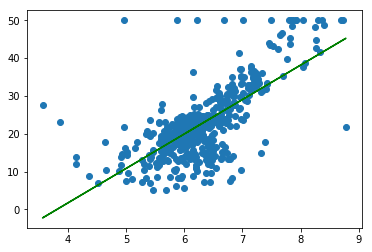

In [33]:
plt.scatter(X_rooms.flatten(),y)
plt.plot(X_rooms.flatten(), model.predict(X_rooms),'g')
plt.show()

In [34]:
model.intercept_

-34.67062077643857

In [35]:
model.coef_

array([9.10210898])

In [36]:
-34 + 9.1 * no_rooms

NameError: name 'no_rooms' is not defined

In [37]:
mean_squared_error(y,model.predict(X_rooms))

43.60055177116956

In [38]:
model = LinearRegression()

In [39]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred = model.predict(X)

In [41]:
mean_squared_error(y,y_pred)

21.894831181729206

In [42]:
model.intercept_

36.45948838508995

In [43]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

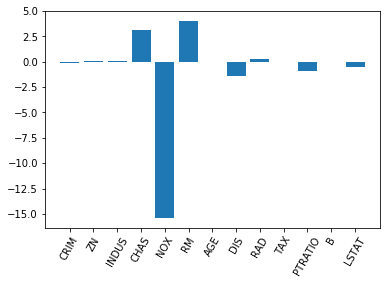

In [60]:
plt.bar(boston.feature_names,model.coef_)
plt.xticks(rotation=60)
plt.show()

In [6]:
boston = datasets.load_boston()

In [7]:
X = boston.data

In [8]:
y = boston.target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [10]:
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7112260057484909

In [11]:
model.score(X_train,y_train)

0.7434997532004697

In [12]:
model.predict(X_test)

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [13]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [ ]:
Compare
KNN vs LinearRegression

Question , which is better?

KNN
1) Equal importance to all columns when calculating distance
2) column1 - 1000-2000
   column2 - 1 -2 
    
    (1000-1100)^2 = 10,000
    (1-2)^2 = 1
     
3) It works badly if all regions are not population. 
Prediction on a unpopulated region, will have large errors.

4) can handle non-linearity 
 
    

Linear Regression
1) If input does not have linear relationship with target,
it will give large errors.
2) Without scaling also it can work fine.
3) It supports different weightages for different features.

In [ ]:
Logistic Regression for binary classification

a1 * x1+ a2*x2+....+ an * xn + b >=0 ? Class 1
a1 * x1+ a2*x2+....+ an * xn + b <0 ? Class 0


Fit
y is  +1 for class 1
y is -1 for class 0


Y Prediction
-infinity to infinity

0-infinity -- class 1
-infinity -0  -- class 0

Y_prediction is mapped from -infinity to +infinity to 0-1 range
using Tanh or Sigmoid function 

0.5 - 1 -- class 1
0  - 0.5  -- class 0

value is same as probability of class 1
1-value is same as probability of class 0


In [ ]:
d(EF)/da = -2

new_value_a = a - 2 * lr


 predicted line 
    y = a*x + b

In [ ]:
iris-setosa
iris-versicolor
iris-viriginica

=> using logistic regression of 2 classes. 
How can we divide 3 classes

setosa vs not-setosa
setosa / versicolor,virgincia   - p1   - 0.2
versiclour / setosa,virginica    - p2  - 0.6
virginica / setosa,versicolour   - p3  - 0.5


Multi-class logisitic regression

In [8]:
iris= datasets.load_iris()
X,y = iris.data,iris.target

In [9]:
model= LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,
                                                stratify=y)

model.fit(X_train,y_train)

model.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9111111111111111

In [10]:
model.intercept_

array([ 0.26054626,  0.92756169, -1.08186955])

In [11]:
model.coef_

array([[ 0.36650111,  1.36928638, -2.08148335, -0.96996888],
       [ 0.5141245 , -1.6570531 ,  0.47982862, -1.30207082],
       [-1.58581056, -1.10417623,  2.16565118,  2.18182696]])

In [12]:
model.predict_proba(X_test)

array([[2.37254987e-04, 4.28463120e-01, 5.71299625e-01],
       [1.21884589e-02, 5.57682714e-01, 4.30128828e-01],
       [3.29179859e-03, 4.82560737e-01, 5.14147464e-01],
       [2.72288591e-02, 4.71277846e-01, 5.01493295e-01],
       [5.24208741e-03, 3.17821915e-01, 6.76935998e-01],
       [7.84055480e-04, 2.03501930e-01, 7.95714014e-01],
       [1.78788378e-02, 6.31980358e-01, 3.50140804e-01],
       [4.46982213e-02, 7.62709386e-01, 1.92592393e-01],
       [8.26122641e-01, 1.73797171e-01, 8.01878732e-05],
       [3.38010652e-03, 2.60504056e-01, 7.36115838e-01],
       [9.23022699e-01, 7.69692975e-02, 8.00391557e-06],
       [8.30410800e-01, 1.69330928e-01, 2.58271726e-04],
       [2.99169088e-04, 4.28080325e-01, 5.71620506e-01],
       [1.37128040e-03, 3.45118387e-01, 6.53510333e-01],
       [8.55379308e-01, 1.44562175e-01, 5.85170232e-05],
       [1.83792675e-03, 1.25712582e-01, 8.72449491e-01],
       [1.23508721e-01, 7.10810999e-01, 1.65680280e-01],
       [8.88949019e-01, 1.11011

In [13]:
model.predict(X_test)

array([2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [14]:
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
model= LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                stratify=y)

model.fit(X_train,y_train)

model.score(X_test,y_test)

In [ ]:
88.88%
100%

In [62]:
boston = datasets.load_boston()

X,y = boston.data,boston.target

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7025010724779142

In [64]:
X.shape
506*0.3

151.79999999999998

In [65]:
When you have data
you have easy points to predict - 
,difficult points to predict- outliers


divide into train-test

if test gets more difficult points - score goes down
if test gets less difficult points - score goes up

When data is vey less

50,000 rows of data
15,000 rows -test
35,000 rows -train

0.65-0.79





Cross Validation

Divide full data into folds

20% - fold1
20% - fold2
20% - fold3
20% - fold4
20% - fold5

5 folds

1st time 
fold1 - test ,
folds 2,3,4,5 - train
score1

2nd time
fold2 - test,
folds 1,3,4,5 - train
score2

3rd time
fold3-test
...
score3

4th time
fold4-test
...
score4

5th time
fold5-test
...
score5



0.65-0.79

SyntaxError: invalid syntax (<ipython-input-65-73e60bfb89e5>, line 1)

In [66]:
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1)

array([0.66875949, 0.7342547 , 0.70986601, 0.77595168, 0.68727731])

In [18]:
#np.mean(cross_val_score(LinearRegression(),X,y,cv=5,n_jobs=-1))

#X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
#cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1)

np.mean(cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.7152218388256892

In [68]:
#Regularization


Error function = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)

Reduce error function



EF = 50 when a1 =5 , a2=5, b= 10 
EF = 49      a1=5,  a2=25,b=10    algorithm will select this


model is much more complex -> for only small decrease in error function

=> you are capturing very weak trend
=> which could be noise,

EF = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)
+ alpha * (a1**2+a2**2+a3**2+....+an**2 )


minimize only
a1**2+a2**2+a3**2+....+an**2 
=> a1=0,a2=0,...,an=0
=> b = avarge of all y . 

TEF = 50+ 50  when a1 =5 , a2=5, b= 10 
TEF = 49 + 650     a1=5,  a2=25,b=10

TEF = 50+ 50  when a1 =5 , a2=5, b= 10 
TEF = 25+61        a1=6 ,a2=5,b=10
TEF = 23+74       a1=7,a2=5,b=10

SyntaxError: invalid syntax (<ipython-input-68-4a6ed9d1e855>, line 4)

In [69]:
np.mean(cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.7152218388256892

In [70]:
model= Ridge(alpha=1)
np.mean(cross_val_score(model,X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.7122243591781483

In [71]:
model= LinearRegression()
model.fit(X_shuffle,y_shuffle)
print(model.coef_)
print(model.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838508953


In [72]:
model1= Ridge()
model1.fit(X_shuffle,y_shuffle)
print(model1.coef_)
print(model1.intercept_)

[-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01]
31.597669818274213


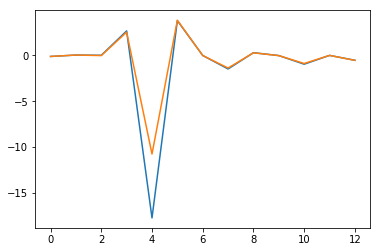

In [73]:
plt.plot(model.coef_)
plt.plot(model1.coef_)
plt.show()

In [ ]:
Algorithms

KNN classification,regression
Linear Regression,Ridge,Lasso
Logistic Regression
SVM,Linear SVM c,r
Decistion Tree 
NEural networks
CNN
COmbinations like Voting classifier,Random forests,Gradient boosting
KMeans




ML Techniques

1) train test split
2) cross validation
3) regularization
4) Missibg values
5) Categorical features
6) Scaling data
7) Dimensionality reduction wi
th PCA
8) Visualization with TSNE
9) Grid search for fine tuning
10) Pipelines


In [ ]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [ ]:
X.describe()

In [ ]:
new_value = old_value - slope* learning_rate
Regulariazation = Error function + alpha (a1^2+a2^2+a3^3)

In [ ]:
values1 = [1,2,3,4,5,5,6,7,8,9,10]
values2 = [25,200,500,47,10,100,300]

value => (value - mean(columns))/std(column)=> -2 to 2

In [23]:
wines = datasets.load_wine()

In [24]:
X = pd.DataFrame(wines.data,columns=wines.feature_names)
y = wines.target

In [25]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [26]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [27]:
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=11),X_shuffle,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.7027027  0.72222222 0.66666667 0.68571429 0.73529412]
0.7025199989905871


In [28]:
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)

In [30]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=23),X_scaled,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.94594595 0.91666667 0.97222222 0.97142857 1.        ]
0.9612526812526813


In [31]:
X_scaled = pd.DataFrame(X_scaled,columns=wines.feature_names)
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.312420
1,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,1.060776
2,-0.087232,0.425180,1.218995,0.451946,-0.262708,-1.209940,-1.535336,1.354888,-1.473326,-0.198156,-0.822404,-0.426113,-0.467781
3,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
4,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385


In [32]:
X_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.335386e-15,-1.283150e-15,2.429081e-15,-4.584348e-17,-1.496930e-17,-7.325601e-16,1.419199e-15,-9.946787e-16,6.502289e-16,1.234343e-15,-1.254926e-15,1.556807e-15,-1.029139e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [33]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [34]:
X_shuffle,y_shuffle  = shuffle(X,y, random_state=42)

In [35]:
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)

In [36]:
scores= cross_val_score(LinearRegression(),X_scaled,y_shuffle,cv=5)
print(scores)
print(np.mean(scores))

[0.66875949 0.7342547  0.70986601 0.77595168 0.68727731]
0.7152218388256883


In [ ]:
model1 = LinearRegression()
model1.fit(X_scaled,y_shuffle)
model2 = Ridge(alpha=1)
model2.fit(X_scaled,y_shuffle)
model3 = Lasso(alpha=0.01)
model3.fit(X_scaled,y_shuffle)

In [ ]:
plt.bar(boston.feature_names, model1.coef_)
plt.xticks(rotation=60)
plt.show()

In [ ]:
plt.bar(boston.feature_names, model2.coef_)
plt.xticks(rotation=60)
plt.show()

In [ ]:
plt.bar(boston.feature_names, model3.coef_)
plt.xticks(rotation=60)
plt.show()

In [186]:
wines = datasets.load_wine()
X,y = wines.data,wines.target
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)
params = {
    'n_neighbors': range(1,21),
    'weights' : ['uniform','distance'], 
    'p': [1,2,3]
}

model = GridSearchCV(KNeighborsClassifier(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
model.best_params_

In [ ]:
model.best_score_

In [ ]:
params = {
#     'C': powers    
    'C': zoomed*0.01
}

model = GridSearchCV(LogisticRegression(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

In [ ]:
model.best_params_

In [ ]:
model.best_score_

In [ ]:
0.01-1 => 100 values here

(1,100)*0.01
(0.01,1)=> 100 values

In [ ]:
Full data - 1 billion points

Dataset - 500 points
=> we might over-fit your hyper-paramaters to the data.

CV 80% train, 20%test
5 folds


Keep 1 seperate validation. Dont use it at all. Use it only for final score,
once all fine-tuning is done


train, test

Cross-validation 
TRAIN,Test

cross-validation ,hyper-parameter tuning - train

Last step verify with test


In [181]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_shuffle,
                                                test_size=0.3)

In [182]:
params = {
    'n_neighbors': range(1,21),
    'weights' : ['uniform','distance'], 
    'p': [1,2,3]
}
model= GridSearchCV(KNeighborsClassifier(),params,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [183]:
model.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [187]:
model.best_score_

0.9775280898876404

In [188]:
model.score(X_test,y_test)

1.0

In [ ]:
params = {
#     'C': powers   
    'C': zoomed*0.1
    
}

model = GridSearchCV(LogisticRegression(),params,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

In [ ]:
model.best_params_

In [ ]:
model.best_score_

In [ ]:
model.score(X_test,y_test)

In [1]:
(1)Cancer - classification

shuffle
scaling
train_test split
griseearchcv hyperparamater tuning
validate on testset



(1)KNN
(2)LogisiticRegression

(2) Diabetes dataset - regression

   (1)KNN regressor
    (2)Linear regression,Ridge,Lasso
    

Best possible score

(3)datasets.load_digits 

try KNN,LogisticRegression

=> highest ???



SyntaxError: invalid syntax (<ipython-input-1-a38e2491db2a>, line 1)

In [2]:
Algorithm 
1)KNN  Classfier,Regressior
2) Logistic regression and linear regression





ML TECHIQUES

train_test_split
crossvalidation
regularization
grid search cv
scaling 
shufflig


missing value
catagorical


SyntaxError: invalid syntax (<ipython-input-2-bc118f5acda5>, line 1)

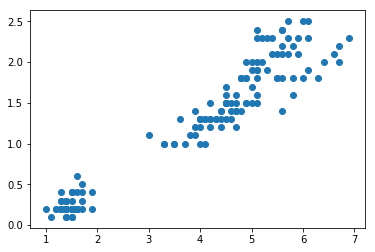

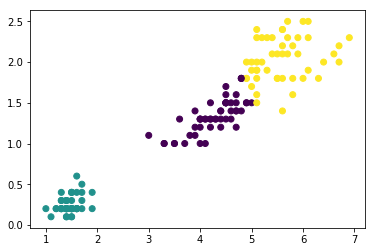

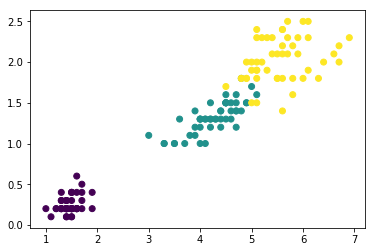

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [4]:


iris=datasets.load_iris()

X,y=iris.data,iris.target

X_2d=X[:,[2,3]]

X_2d

plt.scatter(X_2d[:,0],X_2d[:,1])
plt.show()

model=KMeans(n_clusters=3)
model.fit(X_2d)
labels=model.predict(X_2d)
plt.scatter(X_2d[:,0],X_2d[:,1],c=labels)
plt.show()

plt.scatter(X_2d[:,0],X_2d[:,1],c= y)
plt.show()

labels

df=pd.DataFrame({'species':y,'labels':labels})
pd.crosstab(df.species,df.labels)

for i in range(len(iris.target_names)):
    df.species.replace(i,iris.target_names[i],inplace=True)

pd.crosstab(df.species,df.labels)

model.cluster_centers_